# Sprint11　Simpleconv1d

# 【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成
チャンネル数を1に限定した1次元畳み込み層のクラスSimpleConv1dを作成してください。基本構造は前のSprintで作成した全結合層のFCクラスと同じになります。なお、重みの初期化に関するクラスは必要に応じて作り変えてください。Xavierの初期値などを使う点は全結合層と同様です。


ここでは パディング は考えず、ストライド も1に固定します。また、複数のデータを同時に処理することも考えなくて良く、バッチサイズは1のみに対応してください。この部分の拡張はアドバンス課題とします。

In [1]:
import numpy as np

class Scratch1dCNNClassifier:
    '''
    NN畳み込み層
    '''
    def __init__(self, W, B, stride=1, pad=0):
        '''
        初期化
        ---
        引数

        W: 重み
        B: バイアス
        stride: ストライド数 
        pad: パディング数 #パディングとは特徴マップの縁を0で埋める処理
        ---
        '''
        self.W = W
        self.B = B
        self.stride = stride
        self.pad = pad


    def forward(self, X):
        self.X = X

        if W.ndim == 1:
            FH = 1
        else:
            FH = W.shape[1] #フィルターの高さ
        FW = self.W.shape[0] #フィルターの幅

        if X.ndim == 1:
            XH = 1
        else:
            XH = X.shape[1] #Xの高さ
        XW = X.shape[0] #Xの幅

        F = W.size

        #畳み込み演算
        self.out = np.array([])
        for i in range(FH):
            for j in range(FW - self.stride):
                self.out = np.append(self.out, np.dot(X[j : FW+j ], self.W.T) + self.B)

        return self.out


X = np.array([1,2,3,4])
W = np.array([3, 5, 7])
B = np.array([1])

a = Scratch1dCNNClassifier(W, B)
out = a.forward(X)

# 【問題2】1次元畳み込み後の出力サイズの計算
畳み込みを行うと特徴量の数が変化します。どのように変化するかは以下の数式から求められます。パディングやストライドも含めています。この計算を行う関数を作成してください。

In [2]:
def Conv_output_cal(N_in, pad, F, stride):
    return (N_in + 2 * pad - F) / stride + 1

N_in = X.shape[0]
pad = 1
F = W.shape[0]
stride = 1

Conv_output_cal(N_in, pad, F, stride)

4.0

# 【問題3】小さな配列での1次元畳み込み層の実験
次に示す小さな配列でフォワードプロパゲーションとバックプロパゲーションが正しく行えているか確認してください。

In [3]:
class Scratch1dCNNClassifier:
    '''
    NN畳み込み層
    '''
    def __init__(self, W, B, lr, stride, pad):
        '''
        初期化
        ---
        引数

        W: 重み
        B: バイアス
        lr = 学習率
        stride: ストライド数 
        pad: パディング数 #パディングとは特徴マップの縁を0で埋める処理
        ---
        '''
        self.W = W
        self.B = B
        self.lr = lr
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.X = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = []
        self.db = None


    def forward(self, X):
        self.X = X

        if W.ndim == 1:
            FH = 1
        else:
            FH = W.shape[1] #フィルターの高さ
        FW = self.W.shape[0] #フィルターの幅

        if X.ndim == 1:
            XH = 1
        else:
            XH = X.shape[1] #Xの高さ
        XW = X.shape[0] #Xの幅


        #畳み込み演算
        self.out = np.array([])
        for i in range(FH):
            for j in range(FW - self.stride):
                self.out = np.append(self.out, np.dot(X[j : FW+j ], self.W.T) + self.B)

        return self




    def backward(self , dA):
        X_index = np.arange(dA.shape[0]) #インデックス値
        n_iter = int(self.X.shape[0] - dA.shape[0] // self.stride + 1)
        
        #バイアス勾配計算
        self.dB = np.sum(dA)

        #重み勾配計算
        for k in range(n_iter):
            self.dW.append( np.dot(self.X[X_index + k].T, dA) )

        #出力値計算
        dZ = np.zeros(self.X.shape[0])

        for i in range(dA.shape[0]):
            dZ[i : i + self.W.shape[0] ] += self.W * dA[i]

        #重み、バイアス更新
        self.dW = np.array(self.dW)
        self.W = self.W - self.lr * self.dW
        self.B = self.B - self.lr * self.dW
        
        return dZ


X = np.array([1,2,3,4])
W = np.array([3, 5, 7])
B = np.array([1])
lr = 0.01
stride = 1
pad = 0

b = Scratch1dCNNClassifier(W, B, lr, stride, pad).forward(X)
dA = np.array([10, 20]) #流れてきた誤差
dZ = b.backward(dA)

print(dZ)

[ 30. 110. 170. 140.]


# 【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成
チャンネル数を1に限定しない1次元畳み込み層のクラスConv1dを作成してください。

In [4]:
class Conv1d:
    '''
    NN畳み込み層
    '''
    def __init__(self, W, B, lr, stride, pad):
        '''
        初期化
        ---
        引数

        W: 重み
        B: バイアス
        lr = 学習率
        stride: ストライド数 
        pad: パディング数 #パディングとは特徴マップの縁を0で埋める処理
        ---
        '''
        self.W = W
        self.B = B
        self.lr = lr
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.X = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = []
        self.db = None


    def forward(self, X):
        self.X = X

        if self.W.ndim == 1:
            FH = 1
        else:
            FH = 1 #フィルターの高さ
        FW = self.W.shape[2] #フィルターの幅
        C = self.W.shape[1] #フィルター出力チャンネル数
        FN = self.W.shape[0] #フィルター入力チャンネル数

        if X.ndim == 1:
            XH = 1
        else:
            XH = 1
        XH = 1 #Xの高さ
        XW = X.shape[1] #Xの幅
        XC = X.shape[0] #Xの入力チャンネル数


        #畳み込み演算
        self.out = []
        for i in range(FN):
            temp_out_2 = []
            for k in range(C):
                temp_out_1 = []
                for j in range(FW - self.stride):
                    temp_out_1.append( np.dot( X[k ,  j : FW + j ], self.W[i, k].T ) )
                temp_out_2.append(sum(temp_out_1) + self.B[i])
            self.out.append(temp_out_2)

        return self.out


X = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # shape(2, 4)で、（入力チャンネル数、特徴量数）である。
W = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
B = np.array([1, 2, 3]) # （出力チャンネル数）
lr = 0.01
stride = 1
pad = 0

c = Conv1d(W, B, lr, stride, pad)
c_out = c.forward(X)
print(c_out)

[[16.0, 22.0], [17.0, 23.0], [18.0, 24.0]]


# 【問題8】学習と推定
これまで使ってきたニューラルネットワークの全結合層の一部をConv1dに置き換えてMNISTを学習・推定し、Accuracyを計算してください。


出力層だけは全結合層をそのまま使ってください。ただし、チャンネルが複数ある状態では全結合層への入力は行えません。その段階でのチャンネルは1になるようにするか、 平滑化 を行なってください。


画像に対しての1次元畳み込みは実用上は行わないことのため、精度は問いません。

In [7]:
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)


X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1] 
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]



class Conv1d_Arbitrary_Strides:
    
    def __init__(self, b_size, initializer, optimizer, n_in_channels=1, n_out_channels=1, pa=0, stride=1):
        self.b_size = b_size
        self.optimizer = optimizer
        self.pa = pa
        self.stride = stride
        self.W = initializer.W(n_out_channels, n_in_channels, b_size)
        self.B = initializer.B(n_out_channels)
        self.n_in_channels = n_in_channels
        self.n_out_channels = n_out_channels
        self.n_out = None
        
    def forward(self, X):
        self.n_samples = X.shape[0]
        self.n_in = X.shape[-1]
        self.n_out = output_size_calculation(self.n_in, self.b_size, self.pa, self.stride)
        X = X.reshape(self.n_samples, self.n_in_channels, self.n_in)
        self.X = np.pad(X, ((0,0), (0,0), ((self.b_size-1), 0)))
        self.X1 = np.zeros((self.n_samples, self.n_in_channels, self.b_size, self.n_in+(self.b_size-1)))
        for i in range(self.b_size):
            self.X1[:, :, i] = np.roll(self.X, -i, axis=-1)
        A = np.sum(self.X1[:, np.newaxis, :, :, self.b_size-1-self.pa:self.n_in+self.pa:self.stride]*self.W[:, :, :, np.newaxis], axis=(2, 3)) + self.B.reshape(-1,1)
        return A
    
    def backward(self, dA):
        self.dW = np.sum(dA[:, :, np.newaxis, np.newaxis]*self.X1[:, np.newaxis, :, :, self.b_size-1-self.pa:self.n_in+self.pa:self.stride], axis=(0, -1))
        self.dB = np.sum(dA, axis=(0, -1))
        self.dA = np.pad(dA, ((0,0), (0,0), (0, (self.b_size-1))))
        self.dA1 = np.zeros((self.n_samples, self.n_out_channels, self.b_size, self.dA.shape[-1]))
        for i in range(self.b_size):
            self.dA1[:, :, i] = np.roll(self.dA, i, axis=-1)
        dX = np.sum(self.W[:, :, :, np.newaxis]*self.dA1[:, :, np.newaxis], axis=(1,3))
        self.optimizer.update(self)
        return dX


class Sigmoid:
    
    def forward(self, A):
        self.A = A
        return self.sigmoid(A)
    
    def backward(self, dZ):
        _sig = self.sigmoid(self.A)
        return dZ * (1 - _sig)*_sig
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

class Tanh:
    
    def forward(self, A):
        self.A = A
        return np.tanh(A)
    
    def backward(self, dZ):
        return dZ * (1 - (np.tanh(self.A))**2)

class Softmax:
    
    def forward(self, X):
        self.Z = np.exp(X) / np.sum(np.exp(X), axis=1).reshape(-1,1)
        return self.Z
    
    def backward(self, Y):
        self.loss = self.loss_func(Y)
        return self.Z - Y
    
    def loss_func(self, Y, Z=None):
        if Z is None:
            Z = self.Z
        return (-1)*np.average(np.sum(Y*np.log(Z), axis=1))

class ReLU:
    
    def forward(self, A):
        self.A = A
        return np.clip(A, 0, None)
    
    def backward(self, dZ):
        return dZ * np.clip(np.sign(self.A), 0, None)

class FC:

    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        
    def forward(self, X):
        self.X = X
        A = X@self.W + self.B
        return A
    
    def backward(self, dA):
        dZ = dA@self.W.T
        self.dB = np.sum(dA, axis=0)
        self.dW = self.X.T@dA
        self.optimizer.update(self)
        return dZ

class XavierInitializer:
    
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(1 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B
    
class HeInitializer():
    
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B

class SimpleInitializer:

    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, *shape):
        W = self.sigma * np.random.randn(*shape)
        return W
    
    def B(self, *shape):
        B = self.sigma * np.random.randn(*shape)
        return B


class SGD:

    def __init__(self, lr):
        self.lr = lr
    
    def update(self, layer):
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return

class AdaGrad:
    
    def __init__(self, lr):
        self.lr = lr
        self.HW = 1
        self.HB = 1
    
    def update(self, layer):
        self.HW += layer.dW**2
        self.HB += layer.dB**2
        layer.W -= self.lr * np.sqrt(1/self.HW) * layer.dW
        layer.B -= self.lr * np.sqrt(1/self.HB) * layer.dB

import math
class ScratchCNNClassifier:
    
    def __init__(self, num_epoch=10, lr=0.01, batch_size=20, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, verbose=True, Activater=Tanh, Optimizer=AdaGrad):
        self.num_epoch = num_epoch
        self.lr = lr
        self.verbose = verbose  
        self.batch_size = batch_size 
        self.n_features = n_features 
        self.n_nodes2 = n_nodes2 
        self.n_output = n_output 
        self.Activater = Activater
        if Activater == Sigmoid or Activater == Tanh:
            self.Initializer = XavierInitializer
        elif Activater == ReLU:
            self.Initializer = HeInitializer
        self.Optimizer = Optimizer
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.val_enable = False
        if X_val is not None:
            self.val_enable = True
        self.Conv1d_Arbitrary_Strides = Conv1d_Arbitrary_Strides(b_size=7, initializer=SimpleInitializer(0.01), optimizer=self.Optimizer(self.lr), n_in_channels=1, n_out_channels=1, pa=3, stride=2)
        self.Conv1d_Arbitrary_Strides.n_out = output_size_calculation(X.shape[-1], self.Conv1d_Arbitrary_Strides.b_size, self.Conv1d_Arbitrary_Strides.pa, self.Conv1d_Arbitrary_Strides.stride)
        self.activation1 = self.Activater()
        self.FC2 = FC(1*self.Conv1d_Arbitrary_Strides.n_out, self.n_nodes2, self.Initializer(), self.Optimizer(self.lr))
        self.activation2 = self.Activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.Initializer(), self.Optimizer(self.lr))
        self.activation3 = Softmax()
        
        self.loss = []
        self.loss_epoch = [self.activation3.loss_func(y, self.forward_propagation(X))]
        
        for _ in range(self.num_epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            self.iter = len(get_mini_batch)
            for mini_X, mini_y in get_mini_batch:
                self.forward_propagation(mini_X)
                self.back_propagation(mini_X, mini_y)
                self.loss.append(self.activation3.loss)
            self.loss_epoch.append(self.activation3.loss_func(y, self.forward_propagation(X)))
        
    def predict(self, X):
        return np.argmax(self.forward_propagation(X), axis=1)
    
    def forward_propagation(self, X):
        A1 = self.Conv1d_Arbitrary_Strides.forward(X)
        A1 = A1.reshape(A1.shape[0], A1.shape[-1])
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3
        
    def back_propagation(self, X, y_true):
        dA3 = self.activation3.backward(y_true) 
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dA1 = dA1[:, np.newaxis]
        dZ0 = self.Conv1d_Arbitrary_Strides.backward(dA1) 

def output_size_calculation(n_in, F, P=0, S=1):
    n_out = int((n_in + 2*P - F) / S + 1)
    return n_out


test3 = ScratchCNNClassifier(num_epoch=20, lr=0.01, batch_size=20, n_features=784, n_nodes1=400, n_nodes2=400, n_output=10, verbose=True, Activater=Tanh, Optimizer=SGD)
test3.fit(X_train_, y_train_)
y_pred = test3.predict(X_test)
accuracy_score(y_test, y_pred)

0.979

# 整数配列のインデックス付け

2行目のようにインデックスを指定することで、配列を値を抽出することができる

```
> x = np.array([[1, 2], [3, 4], [5, 6]])
> x[[0, 1, 2], [0, 1, 0]]
array([1, 4, 5])
```

# 畳み込み演算
*   入力データに対して、フィルター（重み）を用いてアダマール積を求め、総和を記録する
*   (4,4)の入力データに(3,3）のフィルターを用いた場合、出力は(2,2)となる
*   フィルターはカーネルと呼ばれることもある
*   バイアスはフィルターごとに1スカラー。(filter_num, 1, 1）
*   バックプロパゲーション時の流れてきた誤差（dA）は
*   フォワード時にim2col（行列をベクトル化）、バックワード時にcol2im（ベクトルを行列化）する
*   col2im時に割り当てが重なる部分は足し合わせること
*   col2im数式

$${O_h = \left\lceil \cfrac{I_h - F_h + 2\textrm{pad}_{ud}}{\textrm{stride}_{ud}} \right\rceil + 1 \\
O_w = \left\lceil \cfrac{I_w - F_w + 2\textrm{pad}_{lr}}{\textrm{stride}_{lr}} \right\rceil + 1 \\
}$$

# ストライド
*   フィルターの適用間隔
*   アウトプットサイズ（高さ）
$$OH =  \frac{XH+2P-FilterH}{S} + 1$$
*   アウトプットサイズ（幅）
$$OW =  \frac{XW+2P-FilterW}{S} + 1$$
*   出力データのシェイプ


```
 (batch_num, C, H, W)　* (FN, C, FH, FW) = (batch_num, FN, OH, OW)
```

*  WとBの初期化は層ごとにわける（Convはsimple, AffineはXavir or He）



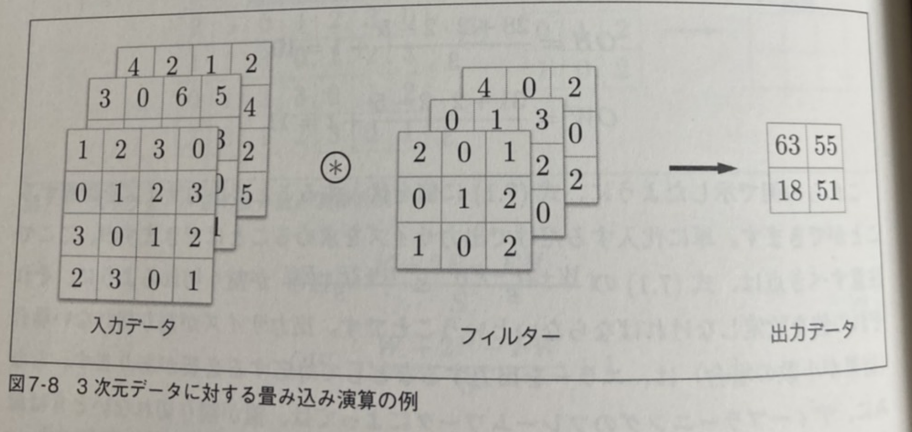

【理論とイメージ】CNNの誤差逆伝播とDeconvolutionまとめ
https://qiita.com/yang_null_kana/items/a3d1bcd429f99942ace4